In [4]:
from Orange.evaluation import compute_CD, graph_ranks
from scipy.stats import friedmanchisquare, rankdata
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:

grammar     =  'cec21' 
generations   = '25'
datasets    = ["octmnist", "pathmnist", "organmnist_axial"] 
algorithms  = ["DBEA", "PAES", "SMSEMOA", "eMOEA", "NSGAII",  "PESA2", "SPEA2"]
files = []

for dataset in datasets:
    for algorithm in algorithms:
        files.append("../output/evaluation/"+dataset+"_"+grammar+"_"+generations+"_"+algorithm+".csv")
        
df = pd.concat(
        map(pd.read_csv, files), ignore_index=True) 

df.groupby(['dataset', 'algorithm']).agg([np.mean, np.std])


accuracy             f1score          
                                mean       std      mean       std
dataset          algorithm                                        
octmnist         DBEA       0.776600  0.005291  0.780121  0.005326
                 NSGAII     0.785033  0.005194  0.789096  0.005925
                 PAES       0.657867  0.147064  0.637542  0.226486
                 PESA2      0.776867  0.008611  0.780575  0.009105
                 SMSEMOA    0.765067  0.016321  0.768144  0.016064
                 SPEA2      0.786767  0.004012  0.791410  0.004394
                 eMOEA      0.761167  0.013102  0.765423  0.013428
organmnist_axial DBEA       0.926158  0.001663  0.925984  0.001724
                 NSGAII     0.927446  0.001447  0.927321  0.001329
                 PAES       0.857905  0.064518  0.858783  0.064621
                 PESA2      0.927041  0.002228  0.926999  0.002013
                 SMSEMOA    0.920897  0.005674  0.920758  0.005570
                 SPEA2      0.928383  0.000103  0.928202  0.000110
                 eMOEA      0.919978  0.004828  0.919970  0.004742
pathmnist        DBEA       0.892762  0.003159  0.892476  0.003645
                 NSGAII     0.900474  0.003165  0.901777  0.003939
                 PAES       0.782038  0.097267  0.773624  0.121214
                 PESA2      0.897943  0.004046  0.898738  0.004799
                 SMSEMOA    0.876407  0.014945  0.876508  0.014841
                 SPEA2      0.900474  0.003165  0.901777  0.003939
                 eMOEA      0.876351  0.015378  0.876552  0.015574

Null hypothesis: The means of the results of two or more algorithms are the same.
Dataset, objective: octmnist accuracy
	 null hypothesis: rejected
	 p-value: 3.7684749963967316e-07
	 ranking: [3.65 6.9  4.75 5.1  2.1  3.65 1.85]
	 names: ['DBEA', 'PAES', 'SMSEMOA', 'eMOEA', 'NSGAII', 'PESA2', 'SPEA2']
	 cd: 2.8483477258883494


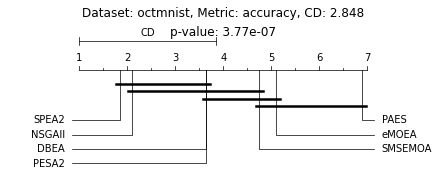

Dataset, objective: octmnist f1score
	 null hypothesis: rejected
	 p-value: 2.9774013444710896e-07
	 ranking: [3.65 6.9  4.85 5.1  2.1  3.55 1.85]
	 names: ['DBEA', 'PAES', 'SMSEMOA', 'eMOEA', 'NSGAII', 'PESA2', 'SPEA2']
	 cd: 2.8483477258883494


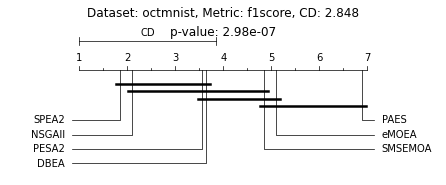

Dataset, objective: pathmnist accuracy
	 null hypothesis: rejected
	 p-value: 5.883060314539191e-09
	 ranking: [4.  6.9 5.5 5.1 2.  2.6 1.9]
	 names: ['DBEA', 'PAES', 'SMSEMOA', 'eMOEA', 'NSGAII', 'PESA2', 'SPEA2']
	 cd: 2.8483477258883494


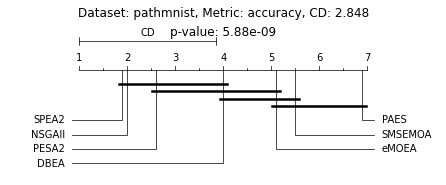

Dataset, objective: pathmnist f1score
	 null hypothesis: rejected
	 p-value: 6.256884277422465e-09
	 ranking: [4.  6.9 5.4 5.2 2.  2.6 1.9]
	 names: ['DBEA', 'PAES', 'SMSEMOA', 'eMOEA', 'NSGAII', 'PESA2', 'SPEA2']
	 cd: 2.8483477258883494


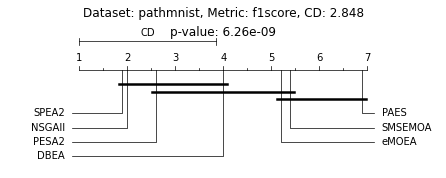

Dataset, objective: organmnist_axial accuracy
	 null hypothesis: rejected
	 p-value: 1.639114063051919e-07
	 ranking: [3.7  6.6  5.15 5.5  2.65 2.7  1.7 ]
	 names: ['DBEA', 'PAES', 'SMSEMOA', 'eMOEA', 'NSGAII', 'PESA2', 'SPEA2']
	 cd: 2.8483477258883494


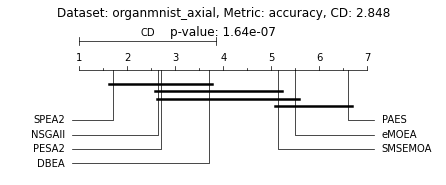

Dataset, objective: organmnist_axial f1score
	 null hypothesis: rejected
	 p-value: 7.281647836812597e-08
	 ranking: [3.7  6.7  5.15 5.5  2.55 2.7  1.7 ]
	 names: ['DBEA', 'PAES', 'SMSEMOA', 'eMOEA', 'NSGAII', 'PESA2', 'SPEA2']
	 cd: 2.8483477258883494


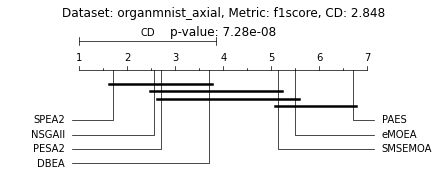

: 

In [6]:
objectives = ['accuracy', 'f1score']
alpha = 0.05
 
print('Null hypothesis:', 'The means of the results of two or more algorithms are the same.')

for dataset in df.dataset.unique():
  
    data = df[df.dataset == dataset]
    algorithms = data.algorithm.unique()
    
    for objective in objectives:
    
        print('Dataset, objective:', dataset, objective)

        df1 = pd.DataFrame({algorithm: list(data[data.algorithm == algorithm][objective]) for algorithm in algorithms})
        values = df1.values
        names = df1.columns   
        
        friedman = friedmanchisquare(*values.T)
        
        ranks = np.array([rankdata(-p) for p in values])
        average_ranks = np.mean(ranks, axis = 0)

        cd = compute_CD(average_ranks, n=len(df1), alpha=str(alpha), test='nemenyi')

        print('\t', 'null hypothesis:', 'rejected' if friedman.pvalue < alpha else 'accepted')
        print('\t', 'p-value:', friedman.pvalue)
        print('\t', 'ranking:', average_ranks)
        print('\t', 'names:', list(names))
        print('\t', 'cd:', cd)

        graph_ranks(average_ranks, names=names, cd=cd)
        
        title = f'Dataset: {dataset}, Metric: {objective}, CD: {round(cd, 3)}'
        plt.title(title)
        plt.suptitle('p-value: {:.2e}'.format(friedman.pvalue))
        plt.savefig(f'../output/friedman/cd_{dataset}_{grammar}_{generations}_{objective}.pdf', bbox_inches='tight')
        plt.show()
